In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [48]:
data = pd.read_csv('../Dataset/Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#### Visualize Data

<Axes: xlabel='YearsExperience', ylabel='Salary'>

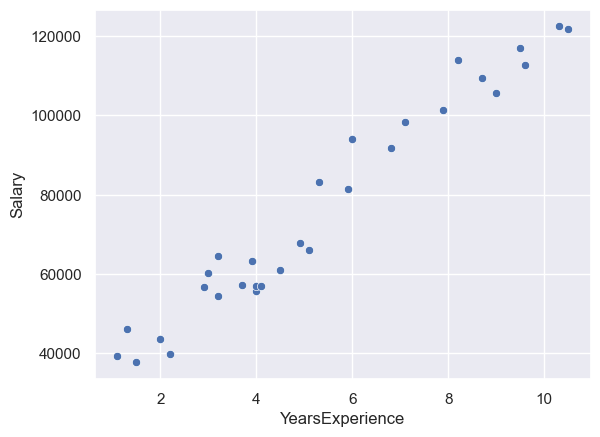

In [49]:
sns.scatterplot(x='YearsExperience', y='Salary', data=data)


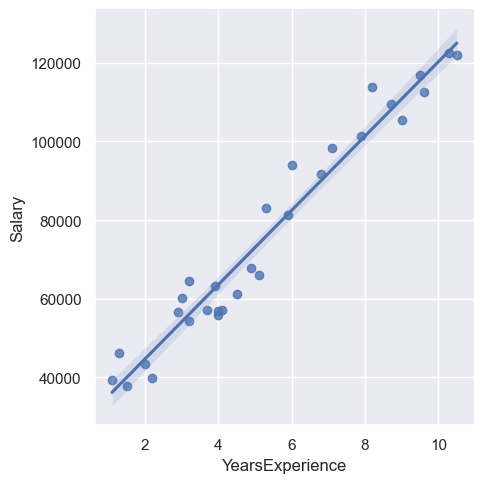

In [50]:
sns.lmplot(x='YearsExperience', y='Salary', data=data) 
# lmplot = linear model plot

In [51]:
# calculate slope
slope, intercept = np.polyfit(x=data.YearsExperience, y=data.Salary, deg=1)
slope, intercept 

(9449.96232145508, 25792.2001986687)

<Axes: >

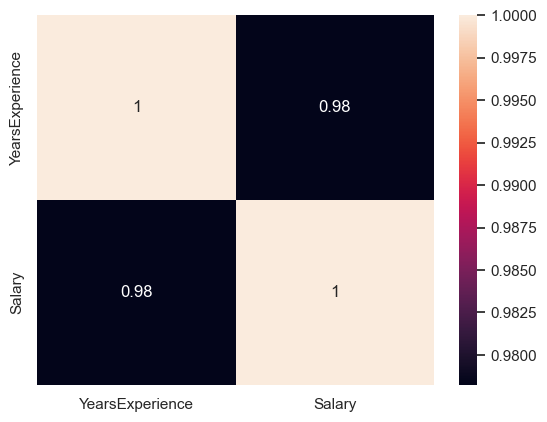

In [52]:
sns.heatmap(data.corr(), annot=True)

#### Splitting Data

In [53]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Fitting Simple Linear Regression to the Training Set

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [75]:
regressor.coef_

array([9360.26128619])

In [76]:
regressor.intercept_

26777.391341197625

#### Predicting the Test Set Results

In [56]:
y_pred = regressor.predict(x_test)
y_pred 

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [57]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088.])

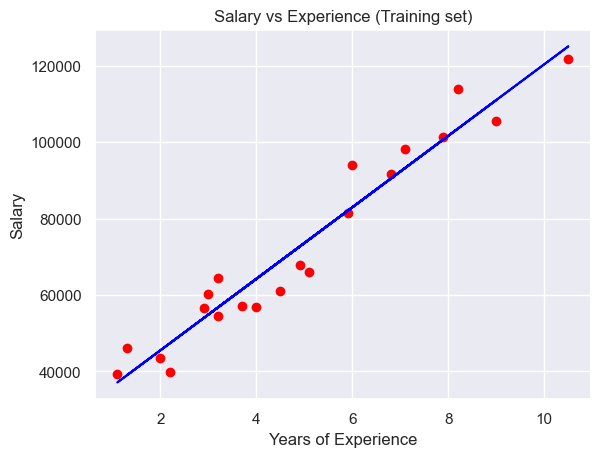

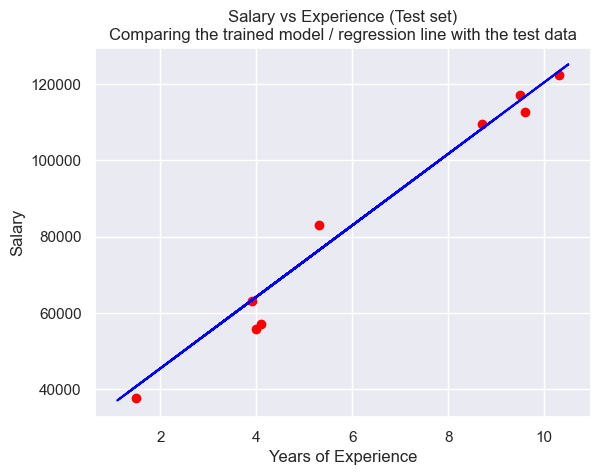

In [66]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary vs Experience (Test set)' + '\n' + 'Comparing the trained model / regression line with the test data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [70]:
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

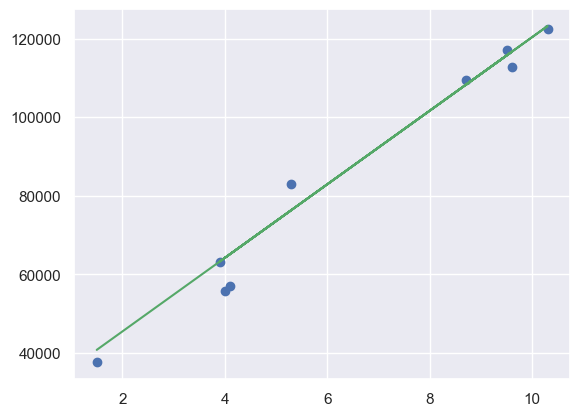

In [78]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'g')

In [81]:
regressor.score(X, y)

0.9565144135078991

In [82]:
regressor.score(x_test, y_test)

0.9740993407213511

In [83]:
from sklearn.metrics import r2_score
print('R2 score: ', r2_score(y_test, y_pred))

R2 score:  0.9740993407213511
